<a href="https://colab.research.google.com/github/Exo-dar/exo/blob/master/Algoritmos_AG3_HectorFernandez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#AG3 - Actividad Guiada 3
Nombre: Héctor Fernández <br>
Link:   https://colab.research.google.com/drive/1GKxoIbofocZ1EWfEfyv0URUdEUU4sxFE?usp=sharing <br>
Github: https://github.com/Exo-dar/exo/blob/master/Algoritmos_AG3_HectorFernandez.ipynb
<br>




In [ ]:
import math
import itertools
import numpy as np
import time

##Programación Dinámica. Viaje por el rio
* **Definición**: Es posible dividir el problema en subproblemas más pequeños, guardando las soluciones para ser utilizadas más adelante.
* **Características** que permiten identificar problemas aplicables:<br>
  -Es posible almacenar soluciones de los subproblemas para ser utilizados más adelante<br>
  -Debe verificar el principio de optimalidad de Bellman: “en una secuencia optima de decisiones, toda sub-secuencia también es óptima” (*)<br>
  -La necesidad de guardar la información acerca de las soluciones parciales unido a la recursividad provoca la necesidad de preocuparnos por la complejidad espacial (cuantos recursos de espacio usaremos)<br>

###Problema<br>
En un río hay **n** embarcaderos y debemos desplazarnos río abajo desde un embarcadero a otro. Cada embarcadero tiene precios diferentes para ir de un embarcadero a otro situado más abajo. Para ir del embarcadero i al j, puede ocurrir que sea más barato hacer un trasbordo por un embarcadero intermedio k. El problema consiste en determinar la combinación más barata.

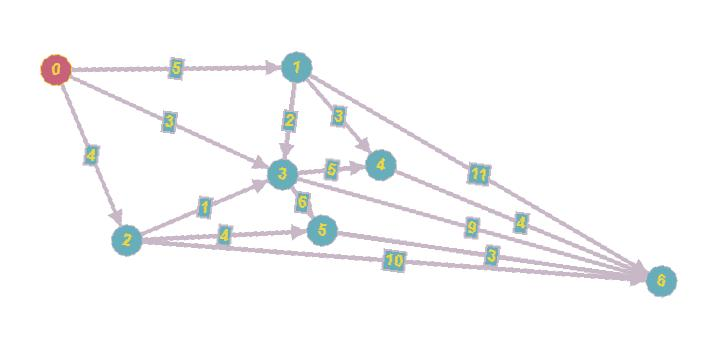

*Consideramos una tabla TARIFAS(i,j) para almacenar todos los precios que nos ofrecen los embarcaderos.<br>
*Si no es posible ir desde i a j daremos un valor alto para garantizar que ese trayecto no se va a elegir en la ruta óptima(modelado habitual para restricciones)

In [ ]:
#Viaje por el rio - Programación dinámica
################################################################################

TARIFAS = [
[0,5,4,3,float("inf"),999,999],   #desde nodo 0
[999,0,999,2,3,999,11],  #desde nodo 1
[999,999, 0,1,999,4,10], #desde nodo 2
[999,999,999, 0,5,6,9],
[999,999, 999,999,0,999,4],
[999,999, 999,999,999,0,3],
[999,999,999,999,999,999,0]
]

#999 se puede sustituir por float("inf") del modulo math
TARIFAS

[[0, 5, 4, 3, inf, 999, 999],
 [999, 0, 999, 2, 3, 999, 11],
 [999, 999, 0, 1, 999, 4, 10],
 [999, 999, 999, 0, 5, 6, 9],
 [999, 999, 999, 999, 0, 999, 4],
 [999, 999, 999, 999, 999, 0, 3],
 [999, 999, 999, 999, 999, 999, 0]]

In [ ]:
#Calculo de la matriz de PRECIOS y RUTAS
#  PRECIOS - contiene la matriz del mejor precio para ir de un nodo a otro
#  RUTAS   - contiene los nodos intermedios para ir de un nodo a otro
################################################################
def Precios(TARIFAS):
################################################################
  #Total de Nodos
  N = len(TARIFAS[0])

  #Inicialización de la tabla de precios
  PRECIOS = [ [9999]*N for i in [9999]*N]  #n x n
  RUTA = [ [""]*N for i in [""]*N]

  #Se recorren todos los nodos con dos bucles(origen - destino)
  #  para ir construyendo la matriz de PRECIOS
  for i in range(N-1):
    for j in range(i+1, N):
      MIN = TARIFAS[i][j]
      RUTA[i][j] = i

      for k in range(i, j):
        if PRECIOS[i][k] + TARIFAS[k][j] < MIN:
            MIN = min(MIN, PRECIOS[i][k] + TARIFAS[k][j] )
            RUTA[i][j] = k
        PRECIOS[i][j] = MIN

  return PRECIOS,RUTA

In [ ]:
PRECIOS,RUTA = Precios(TARIFAS)
#print(PRECIOS[0][6])

print("PRECIOS")
for i in range(len(TARIFAS)):
  print(PRECIOS[i])

print("\nRUTA")
for i in range(len(TARIFAS)):
  print(RUTA[i])

PRECIOS
[9999, 5, 4, 3, 8, 8, 11]
[9999, 9999, 999, 2, 3, 8, 7]
[9999, 9999, 9999, 1, 6, 4, 7]
[9999, 9999, 9999, 9999, 5, 6, 9]
[9999, 9999, 9999, 9999, 9999, 999, 4]
[9999, 9999, 9999, 9999, 9999, 9999, 3]
[9999, 9999, 9999, 9999, 9999, 9999, 9999]

RUTA
['', 0, 0, 0, 1, 2, 5]
['', '', 1, 1, 1, 3, 4]
['', '', '', 2, 3, 2, 5]
['', '', '', '', 3, 3, 3]
['', '', '', '', '', 4, 4]
['', '', '', '', '', '', 5]
['', '', '', '', '', '', '']


In [ ]:
#Calculo de la ruta usando la matriz RUTA
def calcular_ruta(RUTA, desde, hasta):
  if desde == RUTA[desde][hasta]:
  #if desde == hasta:
    #print("Ir a :" + str(desde))
    return desde
  else:
    return str(calcular_ruta(RUTA, desde, RUTA[desde][hasta])) +  ',' + str(RUTA[desde][hasta])

print("\nLa ruta pasa por:")
print(calcular_ruta(RUTA, 0,6))
print("Con valor ", PRECIOS[0][6])


La ruta pasa por:
0,2,5
Con valor  11


##Problema de Asignacion de tarea

In [ ]:
#Asignacion de tareas - Ramificación y Poda
################################################################################
#    T A R E A
#   A
#   G
#   E
#   N
#   T
#   E

COSTES=[[11,12,18,40],
        [14,15,13,22],
        [11,17,19,23],
        [17,14,20,28]]


In [ ]:
#Calculo del valor de una solucion parcial
def valor(S,COSTES):
  VALOR = 0
  for i in range(len(S)):
    VALOR += COSTES[S[i]][i]
  return VALOR



valor((3,2,  ),COSTES)

34

In [ ]:
#Coste inferior para soluciones parciales
#  (1,3,) Se asigna la tarea 1 al agente 0 y la tarea 3 al agente 1

def CI(S,COSTES):
  VALOR = 0
  #Valores establecidos
  for i in range(len(S)):
    VALOR += COSTES[i][S[i]]

  #Estimacion
  for i in range( len(S), len(COSTES)   ):
    VALOR += min( [ COSTES[j][i] for j in range(len(S), len(COSTES))  ])
  return VALOR

def CS(S,COSTES):
  VALOR = 0
  #Valores establecidos
  for i in range(len(S)):
    VALOR += COSTES[i][S[i]]

  #Estimacion
  for i in range( len(S), len(COSTES)   ):
    VALOR += max( [ COSTES[j][i] for j in range(len(S), len(COSTES))  ])
  return VALOR

CI((0,1),COSTES)

68

In [ ]:
#Genera tantos hijos como como posibilidades haya para la siguiente elemento de la tupla
#(0,) -> (0,1), (0,2), (0,3)
def crear_hijos(NODO, N):
  HIJOS = []
  for i in range(N ):
    if i not in NODO:
      HIJOS.append({'s':NODO +(i,)    })
  return HIJOS

In [ ]:
crear_hijos((0,) , 4)

[{'s': (0, 1)}, {'s': (0, 2)}, {'s': (0, 3)}]

In [ ]:
def ramificacion_y_poda(COSTES):
#Construccion iterativa de soluciones(arbol). En cada etapa asignamos un agente(ramas).
#Nodos del grafo  { s:(1,2),CI:3,CS:5  }
  #print(COSTES)
  DIMENSION = len(COSTES)
  MEJOR_SOLUCION=tuple( i for i in range(len(COSTES)) )
  CotaSup = valor(MEJOR_SOLUCION,COSTES)
  #print("Cota Superior:", CotaSup)

  NODOS=[]
  NODOS.append({'s':(), 'ci':CI((),COSTES)    } )

  iteracion = 0

  while( len(NODOS) > 0):
    iteracion +=1

    nodo_prometedor = [ min(NODOS, key=lambda x:x['ci']) ][0]['s']
    #print("Nodo prometedor:", nodo_prometedor)

    #Ramificacion
    #Se generan los hijos
    HIJOS =[ {'s':x['s'], 'ci':CI(x['s'], COSTES)   } for x in crear_hijos(nodo_prometedor, DIMENSION) ]

    #Revisamos la cota superior y nos quedamos con la mejor solucion si llegamos a una solucion final
    NODO_FINAL = [x for x in HIJOS if len(x['s']) == DIMENSION  ]
    if len(NODO_FINAL ) >0:
      #print("\n********Soluciones:",  [x for x in HIJOS if len(x['s']) == DIMENSION  ] )
      if NODO_FINAL[0]['ci'] < CotaSup:
        CotaSup = NODO_FINAL[0]['ci']
        MEJOR_SOLUCION = NODO_FINAL

    #Poda
    HIJOS = [x for x in HIJOS if x['ci'] < CotaSup   ]

    #Añadimos los hijos
    NODOS.extend(HIJOS)

    #Eliminamos el nodo ramificado
    NODOS =  [  x for x in NODOS if x['s'] != nodo_prometedor    ]

  print("La solucion final es:" ,MEJOR_SOLUCION , " en " , iteracion , " iteraciones" , " para dimension: " ,DIMENSION  )



ramificacion_y_poda(COSTES)

La solucion final es: [{'s': (1, 2, 0, 3), 'ci': 64}]  en  10  iteraciones  para dimension:  4


In [ ]:
# Mejora de nota

# Definición de la función de fuerza bruta
def fuerza_bruta(COSTES):
  #Representacion de la solucion sera una tupla donde cada valor en la coordenada i-sima es la tarea asignada al agente i
  # Ejemplo (1,2,3,4) Tiene valor 11+15+19+28=73
  #
  #¿Cuantas posibilidad hay? n! -> complejidad factorial (exponencial)
  #Con dimensión 11 se va a 1 minuto de ejecución

  mejor_valor = 10e10
  mejor_solucion = ()

  for s in list(itertools.permutations(range(len(COSTES)))):
    #print(s,valor(s,COSTES))
    valor_tmp = valor(s,COSTES)
    if valor_tmp < mejor_valor:
      mejor_valor = valor_tmp
      mejor_solucion = s

  print("La mejor solucion es :", mejor_solucion, " con valor:", mejor_valor)

In [ ]:
#Creamos la función que nos permitirá generar matrices aleatorias
def generar_matriz_aleatoria(n):
    matrix = np.random.randint(0, 100, (n, n))  # Genera una matriz 5x5 con valores entre 0 y 99
    return matrix

In [ ]:
# Ahora ejecutamos ambos algoritmos para matrices de dimensiones 5 a 13

#Dimension 5
for i in range(5, 14):
  mat = generar_matriz_aleatoria(i)
  start_time = time.time()
  ramificacion_y_poda(mat)
  end_time = time.time()
  print("Por ramificacion y poda para dimension ", i, " tarda ", end_time - start_time, " segundos")
  start_time = end_time
  fuerza_bruta(mat)
  end_time = time.time()
  print("Por fuerza bruta para dimension ", i, " tarda ", end_time - start_time, " segundos")


La solucion final es: [{'s': (0, 3, 4, 2, 1), 'ci': 125}]  en  53  iteraciones  para dimension:  5
Por ramificacion y poda para dimension  5  tarda  0.011198043823242188  segundos
La mejor solucion es : (0, 4, 3, 1, 2)  con valor: 125
Por fuerza bruta para dimension  5  tarda  0.0006692409515380859  segundos
La solucion final es: [{'s': (4, 1, 0, 5, 2, 3), 'ci': 156}]  en  41  iteraciones  para dimension:  6
Por ramificacion y poda para dimension  6  tarda  0.012329339981079102  segundos
La mejor solucion es : (0, 1, 5, 2, 4, 3)  con valor: 139
Por fuerza bruta para dimension  6  tarda  0.012129068374633789  segundos
La solucion final es: [{'s': (1, 5, 4, 2, 0, 6, 3), 'ci': 120}]  en  150  iteraciones  para dimension:  7
Por ramificacion y poda para dimension  7  tarda  0.018207073211669922  segundos
La mejor solucion es : (4, 0, 3, 6, 2, 1, 5)  con valor: 120
Por fuerza bruta para dimension  7  tarda  0.02850198745727539  segundos
La solucion final es: [{'s': (3, 2, 0, 4, 7, 6, 5, 1),

En la celda de arriba hemos generados matrices de dimensiones 5 a 13 para observar el comportamiento de ambos algoritmos. De tal modo, que nos permita contestar a las dos preguntas planteadas.

¿Qué complejidad tiene el algoritmo por fuerza bruta?

El algoritmo por fuerza bruta tiene una complejidad de n!. Esto es así porque genera una lista de números del 0 al 𝑛−1, donde n es el tamaño de la matriz COSTES e itertools.permutations, genera todas permutaciones comprendidas en dicha lista, es decir, las N! permutaciones posibles.

¿A partir de que dimensión el algoritmo por fuerza bruta deja de ser una opción?

Como se puede observar en la celda superior, para dimensión 11 ya tarda 3 minutos que podemos considerar que deja de ser una opción viable. En este sentido comentar que, obviamente, si mejoramos el "hardware" sobre el que se ejecuta tardaría menos y lo haría viable para una dimensión mayor; y que, dependiendo del problema a solucionar, 3 minutos podría ser un tiempo viable, pero a partir de la siguiente dimensión al ser un problema de complejidad factorial y multiplicar por 12 dejaría de serlo definitivamente.

¿Hay algún valor de la dimensión a partir de la cual el algoritmo de ramificacion y poda tambien deja de ser una opción valida?

La celda superior no ha podido llegar a una dimensión 13, que era el final del bucle, dado que en el valor de dimensión 12 ha salido un error que decía que se había quedado memoria. Por lo tanto, con las especificaciones de Google Colab, el limite es hasta una dimensión 11.

##Descenso del gradiente

In [ ]:
import math                      #Funciones matematicas
import matplotlib.pyplot as plt  #Generacion de gráficos (otra opcion seaborn)
import numpy as np               #Tratamiento matriz N-dimensionales y otras (fundamental!)
#import scipy as sc

import random

Vamos a buscar el minimo de la funcion paraboloide : $$f(x) =  x² + y²$$

Obviamente se encuentra en (x,y)=(0,0) pero probaremos como llegamos a él a través del descenso del gradiante.

In [ ]:
#Definimos la funcion
#Paraboloide
f  = lambda X:      X[0]**2 + X[1]**2    #Funcion
df = lambda X: [2*X[0] , 2*X[1]]         #Gradiente

df([1,2])

[2, 4]

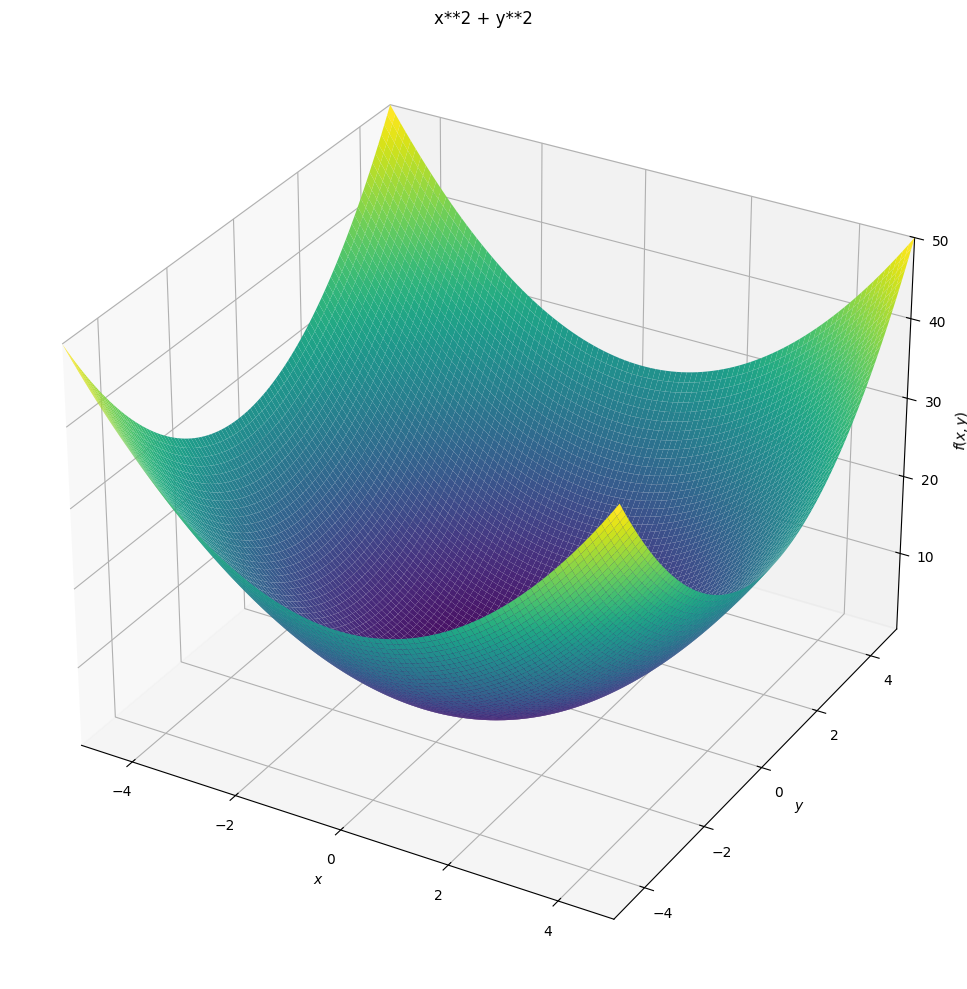

In [ ]:
from sympy import symbols, sin, cos, exp
from sympy.plotting import plot
from sympy.plotting import plot3d
x,y = symbols('x y')
plot3d(x**2 + y**2,
       (x,-5,5),(y,-5,5),
       title='x**2 + y**2',
       size=(10,10))

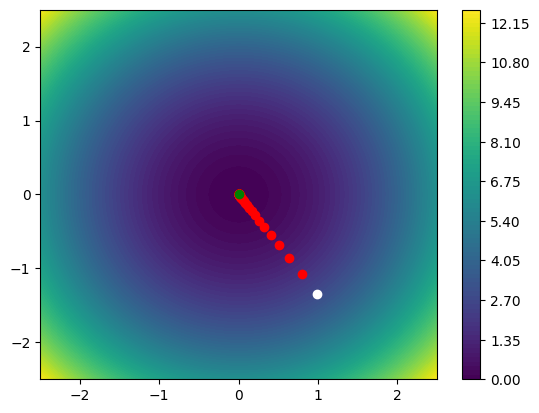

Solucion: [3.485315650337722e-49, -4.721699432719129e-49] 3.444187071542921e-97


In [ ]:
#Prepara los datos para dibujar mapa de niveles de Z
resolucion = 100
rango= 2.5

X=np.linspace(-rango,rango,resolucion)
Y=np.linspace(-rango,rango,resolucion)
Z=np.zeros((resolucion,resolucion))
for ix,x in enumerate(X):
  for iy,y in enumerate(Y):
    Z[iy,ix] = f([x,y])

#Pinta el mapa de niveles de Z
plt.contourf(X,Y,Z,resolucion)
plt.colorbar()

#Generamos un punto aleatorio inicial y pintamos de blanco
P=[random.uniform(-2,2  ),random.uniform(-2,2 ) ]
plt.plot(P[0],P[1],"o",c="white")

#Tasa de aprendizaje. Fija. Sería más efectivo reducirlo a medida que nos acercamos.
TA=.1

#Iteraciones:500
for _ in range(500):
  grad = df(P)
  #print(P,grad)
  P[0],P[1] = P[0] - TA*grad[0] , P[1] - TA*grad[1]
  plt.plot(P[0],P[1],"o",c="red")

#Dibujamos el punto final y pintamos de verde
plt.plot(P[0],P[1],"o",c="green")
plt.show()
print("Solucion:" , P , f(P))


**¿Te atreves a optimizar la función?:**

$$f(x)=sin(1/2 * x^2 - 1/4 * y^2 + 3) * cos(2*x + 1 - e^y)$$
<br>
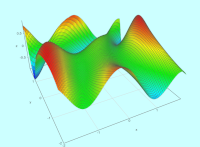


In [ ]:
#Definimos la funcion
f = lambda X: math.sin(1/2 * X[0]**2 - 1/4 * X[1]**2 + 3) *math.cos(2*X[0] + 1 - math.exp(X[1]) )
df = lambda X: [X[0]*math.cos(1 - math.exp(X[1]) + 2*X[0])*math.cos(3 + (X[0]**2)/2 - (X[1]**2)/4) - 2*math.sin(1 - math.exp(X[1]) + 2*X[0])*math.sin(3 + (X[0]**2)/2 - (X[1]**2)/4), math.exp(X[1])*math.sin(1 - math.exp(X[1]) + 2*X[0])*math.sin(3 + (X[0]**2)/2 - (X[1]**2)/4)-1/2*X[1]*math.cos(1 - math.exp(X[1]) + 2*X[0])*math.cos(3 + (X[0]**2)/2 - (X[1]**2)/4)]


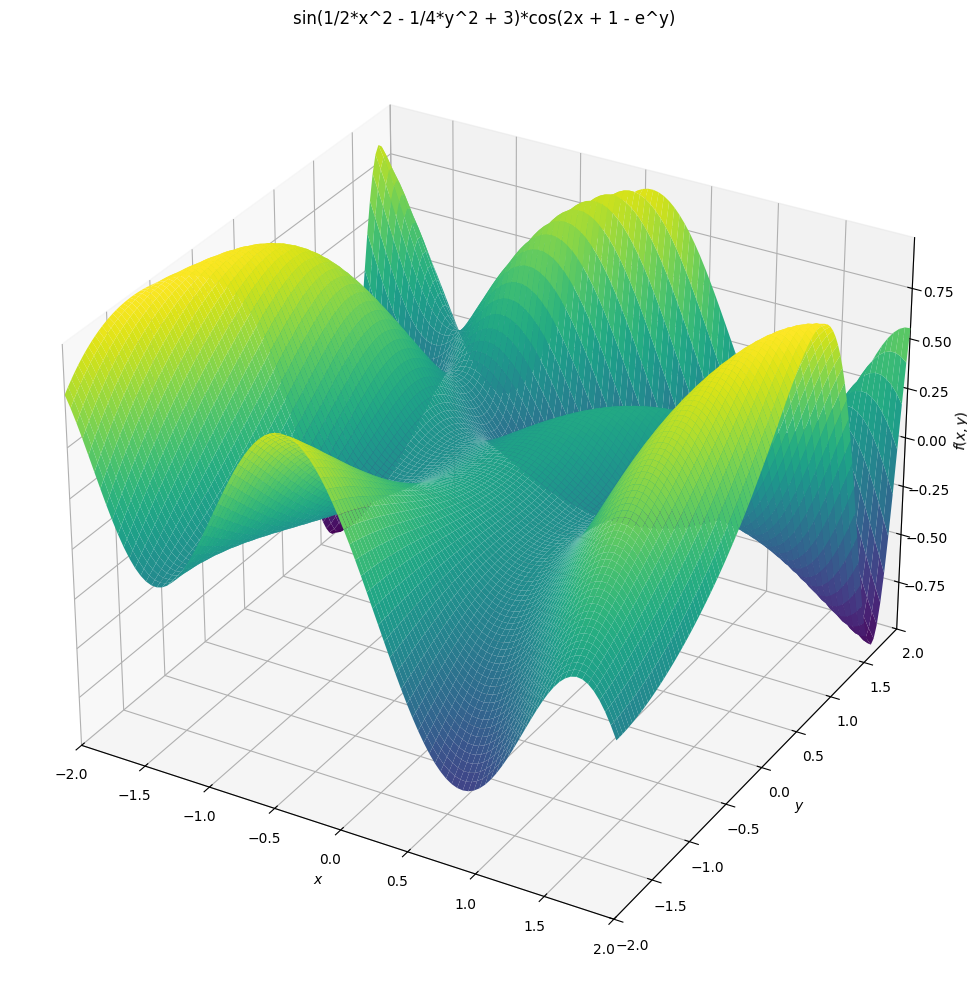

In [ ]:
x,y = symbols('x y')
plot3d(sin(1/2 * x**2 - 1/4 * y**2 + 3) * cos(2*x + 1 - exp(y)),
       (x,-2,2),(y,-2,2),
       title='sin(1/2*x^2 - 1/4*y^2 + 3)*cos(2x + 1 - e^y)',
       size=(10,10))

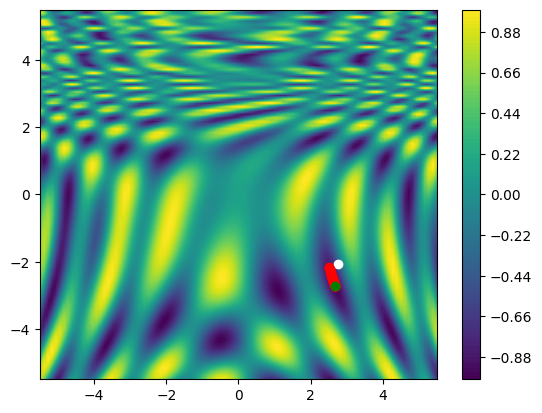

Solucion: [2.6742008391864296, -2.7300447496464315] -1.0


In [ ]:
#Prepara los datos para dibujar mapa de niveles de Z
resolucion = 100
rango= 5.5

X=np.linspace(-rango,rango,resolucion)
Y=np.linspace(-rango,rango,resolucion)
Z=np.zeros((resolucion,resolucion))
for ix,x in enumerate(X):
  for iy,y in enumerate(Y):
    Z[iy,ix] = f([x,y])

#Pinta el mapa de niveles de Z
plt.contourf(X,Y,Z,resolucion)
plt.colorbar()

#Generamos un punto aleatorio inicial y pintamos de blanco
P=[random.uniform(-5,5  ),random.uniform(-5,5 ) ]
plt.plot(P[0],P[1],"o",c="white")

#Tasa de aprendizaje. Fija. Sería más efectivo reducirlo a medida que nos acercamos.
TA=.1

#Iteraciones:500
for _ in range(500):
  grad = df(P)
  #print(P,grad)
  P[0],P[1] = P[0] - TA*grad[0] , P[1] - TA*grad[1]
  plt.plot(P[0],P[1],"o",c="red")

#Dibujamos el punto final y pintamos de verde
plt.plot(P[0],P[1],"o",c="green")
plt.show()
print("Solucion:" , P , f(P))

Emulando el ejemplo anterior hemos realizado un descenso de gradiente para la función:

$$f(x)=sin(1/2 * x^2 - 1/4 * y^2 + 3) * cos(2*x + 1 - e^y)$$

Para ello, primero hemos calculado la derivada, posteriormente, hemos visto la función en un grafico 3D y, finalmente, hemos visualizado el descenso del gradiente. No obstante, cabe destacar que la función a evaluar es sensiblemente más compleja que la primera y no tiene un unico mínimo global, debido a su naturaleza trigonométrica. Por lo tanto, dependiendo del punto inicial, el descenso de gradiente se desplaza hacia el minimo local/global más próximo. Según la última iteración que hemos corrido, uno de los minimos globales se encuentra en [2.674200839186432, -2.7300447496464373] y tiene un valor de -1, aunque, como hemos mencionado, alcanzará un valor de -1 en más puntos de la función.